In [1]:
# 한글 폰트 설치
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 설치 후 colab 경우 Reuntime > Restart session 필요

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 0 not upgraded.
Font directories:
	/root/.local/share/fonts
	/usr/local/share/fonts
	/usr/share/fonts
	/root/.fonts
	/usr/share/fonts/truetype
	/usr/share/fonts/truetype/dejavu
	/usr/share/fonts/truetype/liberation
	/usr/share/fonts/truetype/nanum
/root/.local/share/fonts: skipping, no such directory
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/dejavu: caching, new cache contents: 22 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/root/.fonts: skipping, no such directory
/usr/shar

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용

## data

In [3]:
import pandas as pd
import numpy as np

In [4]:
df_youtube_comments = pd.read_csv("youtube_comments_concat.csv")

In [5]:
df_youtube_comments = df_youtube_comments.dropna()

## 년도별/계절별 댓글 topic 분류

### year

In [6]:
df_youtube_comments['date_year'].value_counts() # 2019 ~ 2024

date_year
2021    7732
2022    7009
2020    6413
2023    5794
2019    3158
2024    1216
Name: count, dtype: int64

In [7]:
df_youtube_comments

,_id,title,date,views,recommend,contents,reply,date_year,date_month,title_noun,dominant_topic_number,reply_clean_mecab,reply_clean_okt,reply_clean_mecab_withoutregion
0,6631d19b119b5f09bb9288e4,"🇰🇷 459일 만에 한국에 왔는데, 골방 신세로 보낸 2주일😷 [자가격리 vlog]",2020-04-11,"조회수 2,696,715회",2.8만,#자가격리브이로그 #여행가jay\n---------------------------...,+해당 영상에 대한 수익금의 일부를 대한민국 의료진에게 기부하였습니다.\n\n점점 ...,2020,4,골방 신세 자 격리,2,해당 수익금 일부 민국 의료진 기부 상황 사태 조심 모두 격리 사회 거리 두기 신...,해당 영상 대한 수익금 일부 대한민국 의료 진 기부 점점 상황 사태 대한 조심성...,해당 수익금 일부 민국 의료진 기부 상황 사태 조심 모두 격리 사회 거리 두기 신...
1,6631d19b119b5f09bb9288e5,"🇰🇷 459일 만에 한국에 왔는데, 골방 신세로 보낸 2주일😷 [자가격리 vlog]",2020-04-11,"조회수 2,696,715회",2.8만,#자가격리브이로그 #여행가jay\n---------------------------...,가족이라 껴안고도싶고 하겠지만 메뉴얼대로 공항에서부터 철저하게 격리절차 밟는과정은 ...,2020,4,골방 신세 자 격리,2,가족 메뉴 공항 철저 격리 절차 과정 시국 모습 부모 존경,가족 메뉴얼 공항 철 격리 절차 과정 정말 시국 모습 부모님 존경 스럽다,가족 뉴 공항 철저 격리 절차 과정 시국 모습 부모 존경
2,6631d19b119b5f09bb9288e6,"🇰🇷 459일 만에 한국에 왔는데, 골방 신세로 보낸 2주일😷 [자가격리 vlog]",2020-04-11,"조회수 2,696,715회",2.8만,#자가격리브이로그 #여행가jay\n---------------------------...,평소에 조카한테 얼마나 잘해줫으면 저렇게 삼촌을 좋아하냐 ㅎㅎ 참 좋은사람이라는게...,2020,4,골방 신세 자 격리,2,평소 조카 삼촌 사람,평소 조카 얼마나 잘 줫으 삼촌 좋 좋다 사람 게 화팅,평소 조카 삼촌 사람
3,6631d19c119b5f09bb9288e7,"🇰🇷 459일 만에 한국에 왔는데, 골방 신세로 보낸 2주일😷 [자가격리 vlog]",2020-04-11,"조회수 2,696,715회",2.8만,#자가격리브이로그 #여행가jay\n---------------------------...,와 눈물나... 2:20 나를 누구보다 아끼고 잘되길 바라는 우리의 부모님들.. 아...,2020,4,골방 신세 자 격리,2,눈물 부모 아들 방 플랜 카드 생각,누구 잘 우리 부모님 들 설레다 방 플랜카드 생각 하니 벅차다,눈물 부모 아들 방 플랜 카드 생각
4,6631d19c119b5f09bb9288e8,"🇰🇷 459일 만에 한국에 왔는데, 골방 신세로 보낸 2주일😷 [자가격리 vlog]",2020-04-11,"조회수 2,696,715회",2.8만,#자가격리브이로그 #여행가jay\n---------------------------...,부모님이 세계여행 응원해주시고 믿어주신거 대단하시네요. 플랜카드까지 달아놓아주신거랑...,2020,4,골방 신세 자 격리,2,부모 세계 응원 플랜 카드 격리 창고 정리 센스,부모님 세계 여행 응원 대단 플랜카드 격리 창고 정리 센스 좋다,부모 세계 응원 플랜 카드 격리 창고 정리 센스
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34451,6631cc977547545ba205e82c,국내여행지 가을 영월 가볼만한곳 BEST 4 붉은 메밀 꽃이 피었습니다 강원도 여행,2021-10-09,"조회수 18,336회",285,국내여행지 가을 영월 가볼만한곳 BEST 4 붉은 메밀 꽃이 피었습니다 강원도 여...,붉은 메일이 있다는건 첨 알았네요. 해외 여행하시는 분들 국내는 다 가보고 해외여행...,2021,10,가을 영월 곳 메밀 꽃 강원도,1,메일 해외 국내 해외 방식 국내 때,붉다 메일 해외 여행 국내 해외여행 방식 영상 국내 유명 곳 여행 때 십년 같다,일 해외 해외 방식
34452,6631cc977547545ba205e82d,국내여행지 가을 영월 가볼만한곳 BEST 4 붉은 메밀 꽃이 피었습니다 강원도 여행,2021-10-09,"조회수 18,336회",285,국내여행지 가을 영월 가볼만한곳 BEST 4 붉은 메밀 꽃이 피었습니다 강원도 여...,영월에 선돌.한반도지형은\n가봤는데 붉은메밀꽃밭\n가보려는데 카카오네비에\n주소 쳐...,2021,10,가을 영월 곳 메밀 꽃 강원도,1,영월 선돌 한반도 지형 메밀꽃 밭 카카오 네비 주소 영월군 목골 마을 네비 주소,영월 선돌 한반도 지형 붉다 메밀 꽃밭 카카오 네 비 주소 안 영월군 목골 마을 안...,영월 선돌 한반도 지형 밀꽃 밭 카카오 네비 주소 영월군 목골 마을 네비 주소
34453,6631cc977547545ba205e82e,국내여행지 가을 영월 가볼만한곳 BEST 4 붉은 메밀 꽃이 피었습니다 강원도 여행,2021-10-09,"조회수 18,336회",285,국내여행지 가을 영월 가볼만한곳 BEST 4 붉은 메밀 꽃이 피었습니다 강원도 여...,영월 ...강추 여행지!!!!!!\n감히 한마디 하자면 ㅋㅋㅋㅋ \n청령포 추가요,2021,10,가을 영월 곳 메밀 꽃 강원도,1,영월 강추 한마디 청령포 추가,영월 강추 여행지 감히 한마디 하자 청령포 추가,영월 강추 한마디 청령포 추가
34454,6631cc977547545ba205e82f,국내여행지 가을 영월 가볼만한곳 BEST 4 붉은 메밀 꽃이 피었습니다 강원도 여행,2021-10-09,"조회수 18,336회",285,국내여행지 가을 영월 가볼만한곳 BEST 4 붉은 메밀 꽃이 피었습니다 강원도 여...,붉은 메밀은 어디가야 볼 수 있을까요? 주소가 궁금합니다,2021,10,가을 영월 곳 메밀 꽃 강원도,1,메밀 주소,붉다 메밀 어디가 볼 수 주소 궁금,밀 주소


In [8]:
pattern = '쏘|곳|이|때|추천|킴스|번|곽|메|유|인|전|대|소개|국내'
df_youtube_comments['reply_clean_mecab'] = df_youtube_comments['reply_clean_mecab'].str.replace(pattern, '', regex=True)

In [9]:
from wordcloud import WordCloud
from collections import Counter

### 연도별로 힐링/예약의 빈도 count 

In [10]:
df_sheets_2024

NameError: name 'df_sheets_2024' is not defined

In [16]:
healing_counts = df_youtube_comments[df_youtube_comments['reply_clean_mecab'].str.contains('힐링')].groupby('date_year').size()
healing_counts

date_year
2019     90
2020    254
2021    349
2022    239
2023    129
2024     29
dtype: int64

In [17]:
reservation_counts = df_youtube_comments[df_youtube_comments['reply_clean_mecab'].str.contains('예약')].groupby('date_year').size()
reservation_counts

date_year
2019      8
2020     13
2021     21
2022     67
2023    211
2024     59
dtype: int64

In [18]:
import seaborn as sns

<Axes: title={'center': "연도별 '힐링' 등장 빈도"}, xlabel='date_year'>

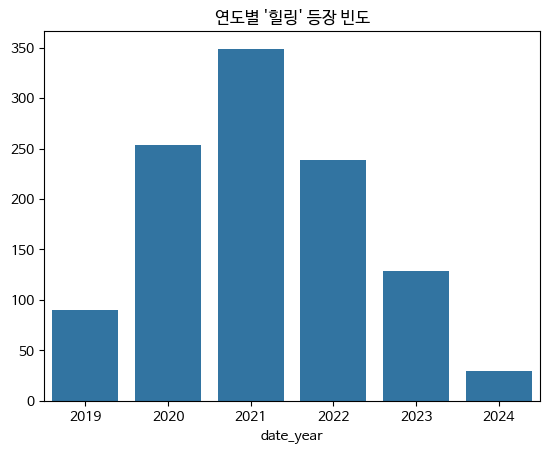

In [19]:
plt.title("연도별 '힐링' 등장 빈도")
sns.barplot(data=healing_counts)

<Axes: title={'center': "연도별 '예약' 등장 빈도"}, xlabel='date_year'>

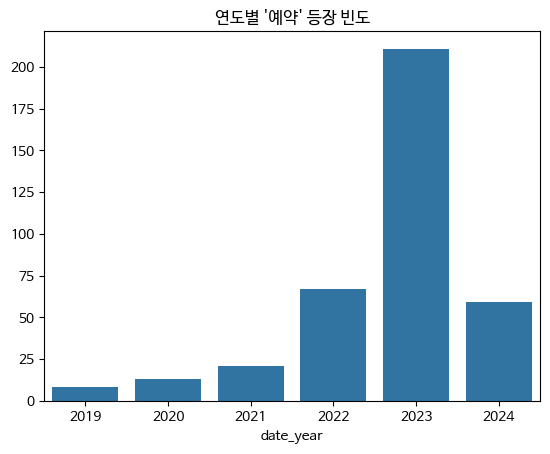

In [20]:
plt.title("연도별 '예약' 등장 빈도")
sns.barplot(data=reservation_counts)

#### 2019

In [21]:
highlighted_words = ["힐링","예약"]

def custom_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    if word in highlighted_words:
        return "green"  # 특정 단어 색상
    else:
        return "gray"   # 나머지 단어 색상

In [22]:
df_sheets_2019 = []
for sheet_name, df in df_youtube_comments.query("date_year == 2019")['reply_clean_mecab'].items() :
  df_sheets_2019.append(df)

In [23]:
text = ' '.join(map(str, df_sheets_2019))
text_split = text.split()
text_split_count = Counter(text_split)

In [24]:
top_30 = pd.Series(text_split_count).sort_values(ascending=False)[:50]

In [25]:
wordCloud = WordCloud(color_func=custom_color_func, background_color="white", font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf').generate_from_frequencies(top_30)


In [26]:
wordCloud.words_

{'경주': 1.0,
 '가을': 0.9324324324324325,
 '밀양': 0.7972972972972973,
 '길': 0.7905405405405406,
 '사람': 0.7094594594594594,
 '힐링': 0.6621621621621622,
 '겨울': 0.6418918918918919,
 '설명': 0.6351351351351351,
 '행복': 0.6148648648648649,
 '주': 0.6148648648648649,
 '생각': 0.5945945945945946,
 '풍경': 0.5878378378378378,
 '코스': 0.5878378378378378,
 '집': 0.581081081081081,
 '음악': 0.5743243243243243,
 '다음': 0.5608108108108109,
 '언니': 0.5608108108108109,
 '최고': 0.5608108108108109,
 '시간': 0.5472972972972973,
 '친구': 0.5067567567567568,
 '눈': 0.49324324324324326,
 '한국': 0.44594594594594594,
 '제주도': 0.44594594594594594,
 '도움': 0.44594594594594594,
 '맛집': 0.4391891891891892,
 '제주': 0.4391891891891892,
 '말': 0.4391891891891892,
 '덕분': 0.4391891891891892,
 '앞': 0.43243243243243246,
 '꽃': 0.43243243243243246,
 '사진': 0.43243243243243246,
 '도': 0.42567567567567566,
 '순천': 0.41216216216216217,
 '부탁': 0.40540540540540543,
 '날': 0.39864864864864863,
 '트래블': 0.39864864864864863,
 '안녕': 0.3918918918918919,
 '여름': 0.385

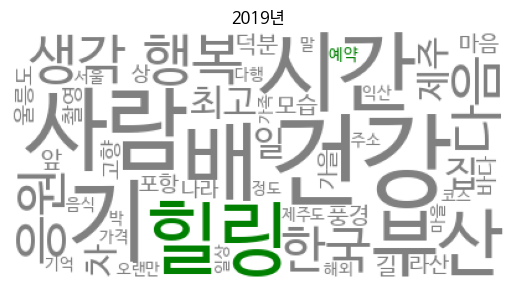

In [60]:
import matplotlib.pyplot as plt
plt.imshow(wordCloud)
plt.axis('off')
plt.title("2019년")
plt.show()

- 가을, 경주, 밀양, 길, 사람, 힐링
- 19년도엔 가을, 경주, 밀양에 관심이 많았다.

#### 2020

In [28]:
df_sheets_2020 = []
for sheet_name, df in df_youtube_comments.query("date_year == 2020")['reply_clean_mecab'].items() :
  df_sheets_2020.append(df)

In [29]:
text = ' '.join(map(str, df_sheets_2020))

In [30]:
text_split = text.split()
text_split_count = Counter(text_split)

In [31]:
top_30 = pd.Series(text_split_count).sort_values(ascending=False)[:50]

In [32]:
wordCloud = WordCloud(color_func=custom_color_func, background_color="white", font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf').generate_from_frequencies(top_30)


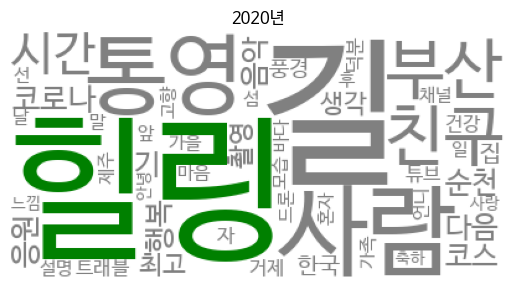

In [33]:
plt.imshow(wordCloud)
plt.axis('off')
plt.title("2020년")
plt.show()

- 힐링, 길, 사람, 통영, 부산, 친구, 코로나
- 이때부터 힐링 여행이 떠오르기 시작한 것으로 예상

#### 2021

In [34]:
df_sheets_2021 = []
for sheet_name, df in df_youtube_comments.query("date_year == 2021")['reply_clean_mecab'].items() :
  df_sheets_2021.append(df)

In [35]:
text = ' '.join(map(str, df_sheets_2021))
text_split = text.split()
text_split_count = Counter(text_split)

In [36]:
top_30 = pd.Series(text_split_count).sort_values(ascending=False)[:50]

In [37]:
wordCloud = WordCloud(color_func=custom_color_func, background_color="white", font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf').generate_from_frequencies(top_30)
wordCloud.words_

{'건강': 1.0,
 '힐링': 0.9207161125319693,
 '길': 0.8644501278772379,
 '부산': 0.8439897698209718,
 '집': 0.7416879795396419,
 '기': 0.7033248081841432,
 '서울': 0.6930946291560103,
 '생각': 0.6624040920716112,
 '울산': 0.6240409207161125,
 '사람': 0.6163682864450127,
 '시간': 0.59846547314578,
 '해외': 0.5907928388746803,
 '최고': 0.5856777493606138,
 '덕분': 0.5754475703324808,
 '응원': 0.5524296675191815,
 '행복': 0.5294117647058824,
 '풍경': 0.5166240409207161,
 '예천': 0.4859335038363171,
 '가을': 0.4782608695652174,
 '다음': 0.46547314578005117,
 '코스': 0.42710997442455245,
 '한국': 0.4219948849104859,
 '친구': 0.4219948849104859,
 '촬영': 0.41687979539641945,
 '공원': 0.40664961636828645,
 '앞': 0.40153452685422,
 '모습': 0.3989769820971867,
 '일상': 0.3938618925831202,
 '고향': 0.391304347826087,
 '일': 0.38107416879795397,
 '코로나': 0.36061381074168797,
 '다행': 0.35805626598465473,
 '여수': 0.3554987212276215,
 '자연': 0.35294117647058826,
 '마음': 0.3350383631713555,
 '음악': 0.3273657289002558,
 '눈': 0.32225063938618925,
 '안동': 0.31457800

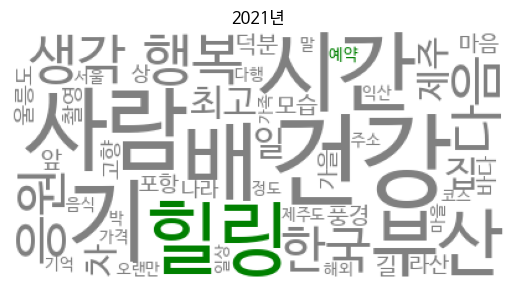

In [67]:
plt.imshow(wordCloud)
plt.axis('off')
plt.title("2021년")
plt.show()

- 건강, 힐링, 부산, 서울, 집, 울산
- 20년부터 코로나로 인해 지친 사람들이 건강, 힐링 여행을 많이 찾았던 것으로 예상

#### 2022

In [39]:
df_sheets_2022 = []
for sheet_name, df in df_youtube_comments.query("date_year == 2022")['reply_clean_mecab'].items() :
  df_sheets_2022.append(df)

In [40]:
text = ' '.join(map(str, df_sheets_2022))
text_split = text.split()
text_split_count = Counter(text_split)

In [41]:
top_30 = pd.Series(text_split_count).sort_values(ascending=False)[:50]

In [42]:
wordCloud = WordCloud(color_func=custom_color_func, background_color="white", font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf').generate_from_frequencies(top_30)


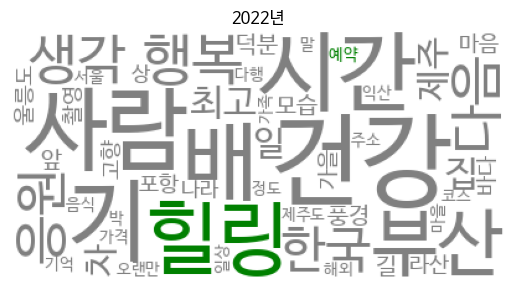

In [68]:
plt.imshow(wordCloud)
plt.axis('off')
plt.title("2022년")
plt.show()

- 건강, 사람, 힐링, 부산, 시간

#### 2023

In [44]:
df_sheets_2023 = []
for sheet_name, df in df_youtube_comments.query("date_year == 2023")['reply_clean_mecab'].items() :
  df_sheets_2023.append(df)

In [45]:
text = ' '.join(map(str, df_sheets_2023))
text_split = text.split()
text_split_count = Counter(text_split)

In [46]:
top_30 = pd.Series(text_split_count).sort_values(ascending=False)[:50]

In [57]:
highlighted_words = ["예약","힐링"]

def custom_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    if word in highlighted_words:
        return "green"  # 특정 단어 색상
    else:
        return "gray"   # 나머지 단어 색상

In [65]:
wordcloud = WordCloud(color_func=custom_color_func, background_color="white", font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf').generate_from_frequencies(top_30)
wordcloud.words_

{'예약': 1.0,
 '길': 0.9175627240143369,
 '시간': 0.6881720430107527,
 '가격': 0.6810035842293907,
 '부산': 0.6451612903225806,
 '사람': 0.6308243727598566,
 '생각': 0.5555555555555556,
 '가능': 0.5555555555555556,
 '최고': 0.5519713261648745,
 '주차장': 0.5197132616487455,
 '집': 0.5053763440860215,
 '나라': 0.4946236559139785,
 '산': 0.4910394265232975,
 '힐링': 0.4767025089605735,
 '한국': 0.4731182795698925,
 '주차': 0.4659498207885305,
 '용': 0.46236559139784944,
 '주': 0.44802867383512546,
 '응원': 0.4336917562724014,
 '설명': 0.40860215053763443,
 '무료': 0.4050179211469534,
 '풍경': 0.4050179211469534,
 '정도': 0.4050179211469534,
 '말': 0.3942652329749104,
 '폭포': 0.3870967741935484,
 '행복': 0.36917562724014336,
 '눈': 0.3548387096774194,
 '돈': 0.35125448028673834,
 '덕분': 0.33691756272401435,
 '꽃': 0.32974910394265233,
 '크루즈': 0.32974910394265233,
 '가을': 0.32616487455197135,
 '날': 0.32616487455197135,
 '다음': 0.3225806451612903,
 '계곡': 0.3225806451612903,
 '촬영': 0.3154121863799283,
 '부탁': 0.3046594982078853,
 '코스': 0.30107

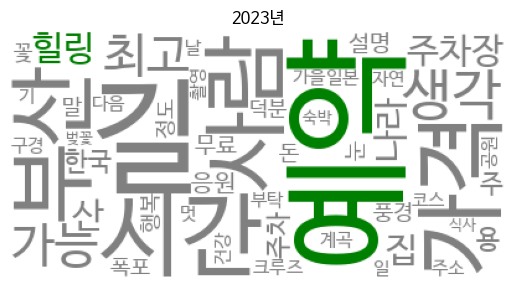

In [69]:
plt.imshow(wordcloud)
plt.axis('off')
plt.title("2023년")
plt.show()

- 예약, 가격, 시간, 길, 부산, 생각
- 23년에는 부산 여행을 많이 갔다? -> 단순히 부산 여행 영상의 댓글이 많았을 수도 있음
- 주로 예약하는듯

#### 2024

In [50]:
df_sheets_2024 = []
for sheet_name, df in df_youtube_comments.query("date_year == 2024")['reply_clean_mecab'].items() :
  df_sheets_2024.append(df)

In [51]:
text = ' '.join(map(str, df_sheets_2024))
text_split = text.split()
text_split_count = Counter(text_split)

In [52]:
text_split_count

Counter({'장가': 93,
         '예약': 71,
         '행복': 52,
         '사람': 39,
         '벚꽃': 37,
         '정선': 36,
         '시간': 35,
         '기차': 34,
         '응원': 33,
         '가능': 33,
         '눈': 33,
         '최고': 33,
         '덕분': 31,
         '생각': 30,
         '힐링': 29,
         '겨울': 28,
         '호텔': 27,
         '채널': 26,
         '제주': 26,
         '구경': 26,
         '길': 25,
         '주말': 24,
         '정도': 24,
         '굿': 23,
         '가격': 23,
         '패키지': 23,
         '봄': 22,
         '다음': 22,
         '자': 22,
         '산': 22,
         '일': 21,
         '용': 21,
         '말': 21,
         '가족': 21,
         '열차': 21,
         '올해': 20,
         '코스': 20,
         '마음': 20,
         '날': 19,
         '식사': 19,
         '음식': 19,
         '버스': 19,
         '꽃': 18,
         '날씨': 18,
         '부탁': 18,
         '출렁다리': 18,
         '수고': 17,
         '거': 17,
         '풍경': 17,
         '앞': 17,
         '안녕': 16,
         '기억': 16,
         '건강': 16,
   

In [282]:
top_30 = pd.Series(text_split_count).sort_values(ascending=False)[:30]

In [53]:
highlighted_words = ["예약","힐링"]

def custom_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    if word in highlighted_words:
        return "green"  # 특정 단어 색상
    else:
        return "gray"   # 나머지 단어 색상

In [54]:
wordcloud = WordCloud(color_func=custom_color_func, background_color="white", font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf').generate_from_frequencies(top_30)


In [55]:
wordCloud.words_

{'건강': 1.0,
 '사람': 0.7905027932960894,
 '기': 0.7653631284916201,
 '시간': 0.7402234636871509,
 '배': 0.7011173184357542,
 '힐링': 0.6871508379888268,
 '부산': 0.6368715083798883,
 '행복': 0.6005586592178771,
 '생각': 0.5782122905027933,
 '다음': 0.5782122905027933,
 '응원': 0.5614525139664804,
 '한국': 0.5586592178770949,
 '최고': 0.5391061452513967,
 '집': 0.5335195530726257,
 '제주': 0.5083798882681564,
 '일': 0.4972067039106145,
 '차': 0.4860335195530726,
 '모습': 0.4553072625698324,
 '길': 0.4441340782122905,
 '풍경': 0.43854748603351956,
 '덕분': 0.4273743016759777,
 '앞': 0.4273743016759777,
 '마음': 0.39664804469273746,
 '포항': 0.39664804469273746,
 '울릉도': 0.39385474860335196,
 '라산': 0.388268156424581,
 '고향': 0.3687150837988827,
 '바다': 0.3575418994413408,
 '가을': 0.3575418994413408,
 '촬영': 0.34916201117318435,
 '나라': 0.34916201117318435,
 '상': 0.3324022346368715,
 '제주도': 0.329608938547486,
 '말': 0.32122905027932963,
 '정도': 0.31564245810055863,
 '서울': 0.30446927374301674,
 '기억': 0.3016759776536313,
 '주소': 0.2988826

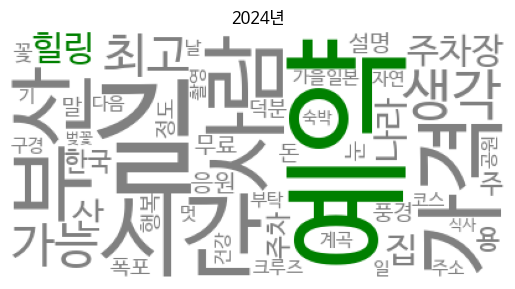

In [70]:
plt.imshow(wordcloud)
plt.axis("off")
plt.title("2024년")
plt.show()

- 장가, 예약, 행복, 사람, 벚꽃, 기차
- 24년이 아직 5월초이므로 겨울, 벚꽃이 많이 나타나는 것으로 예상
- 마찬가지로, 예약이 크게 나타나는 이유는 상반기에 예약을 잡고 하반기에 여행을 가기 때문으로 예상

### season
- 워드클라우드 결과가 계절별 유의미하게 구분되지 않음
- 영상 업로드 날짜와 영상 촬영일에 차이가 있을 수 있으므로 분석 정확하지 않음

In [116]:
df_youtube_comments['date_month'].value_counts()

date_month
5     3728
6     3589
10    3530
9     3123
4     3027
11    2926
7     2830
3     1960
1     1864
12    1760
2     1621
8     1364
Name: count, dtype: int64

- 12, 1, 2 winter
- 3, 4, 5 spring
- 6, 7, 8 summer
- 9, 10, 11 fall

In [41]:
seasons = {
    12: '겨울', 1: '겨울', 2: '겨울',
    3: '봄', 4: '봄', 5: '봄',
    6: '여름', 7: '여름', 8: '여름',
    9: '가을', 10: '가을', 11: '가을'
}
df_youtube_comments['season'] = df_youtube_comments['date_month'].map(seasons)

In [42]:
df_youtube_comments['season'].value_counts()

season
가을    9579
봄     8715
여름    7783
겨울    5245
Name: count, dtype: int64

#### 봄

In [43]:
df_sheets = []
for sheet_name, df in df_youtube_comments.query("season == '봄'")['reply_clean_mecab'].items() :
  df_sheets.append(df)

In [44]:
text = ' '.join(map(str, df_sheets))
text_split = text.split()
text_split_count = Counter(text_split)

In [45]:
top_30 = pd.Series(text_split_count).sort_values(ascending=False)[:30]

In [46]:
wordCloud = WordCloud(background_color='white', font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf')
wordCloud.generate_from_frequencies(top_30)

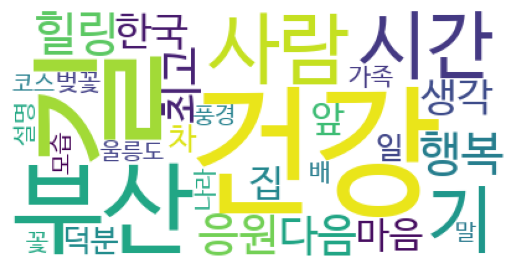

In [47]:
plt.imshow(wordCloud)
plt.axis('off')
plt.show()

#### 여름

In [48]:
df_sheets = []
for sheet_name, df in df_youtube_comments.query("season == '여름'")['reply_clean_mecab'].items() :
  df_sheets.append(df)

In [49]:
text = ' '.join(map(str, df_sheets))
text_split = text.split()
text_split_count = Counter(text_split)

In [50]:
top_30 = pd.Series(text_split_count).sort_values(ascending=False)[:30]

In [51]:
wordCloud = WordCloud(background_color='white', font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf')
wordCloud.generate_from_frequencies(top_30)

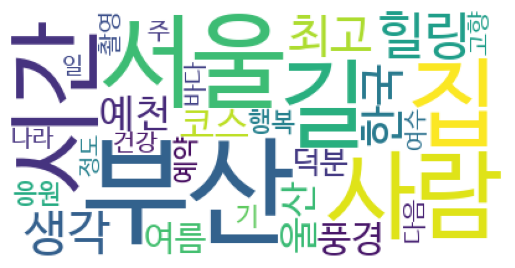

In [52]:
plt.imshow(wordCloud)
plt.axis('off')
plt.show()

#### 가을

In [53]:
df_sheets = []
for sheet_name, df in df_youtube_comments.query("season == '가을'")['reply_clean_mecab'].items() :
  df_sheets.append(df)

In [54]:
text = ' '.join(map(str, df_sheets))
text_split = text.split()
text_split_count = Counter(text_split)

In [55]:
top_30 = pd.Series(text_split_count).sort_values(ascending=False)[:30]

In [56]:
wordCloud = WordCloud(background_color='white', font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf')
wordCloud.generate_from_frequencies(top_30)

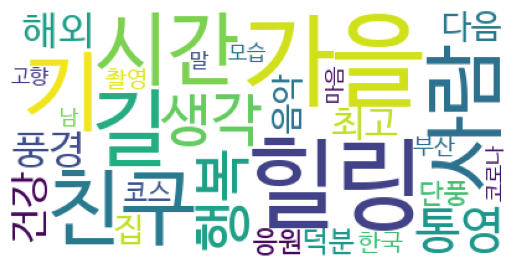

In [57]:
plt.imshow(wordCloud)
plt.axis('off')
plt.show()

#### 겨울

In [58]:
df_sheets = []
for sheet_name, df in df_youtube_comments.query("season == '겨울'")['reply_clean_mecab'].items() :
  df_sheets.append(df)

In [59]:
text = ' '.join(map(str, df_sheets))
text_split = text.split()
text_split_count = Counter(text_split)

In [60]:
top_30 = pd.Series(text_split_count).sort_values(ascending=False)[:30]

In [61]:
wordCloud = WordCloud(background_color='white', font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf')
wordCloud.generate_from_frequencies(top_30)

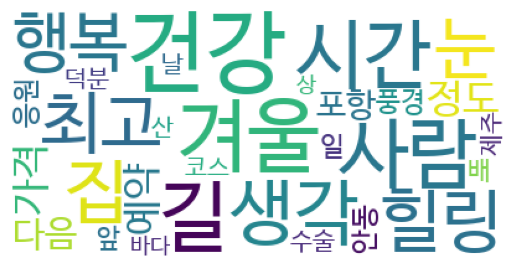

In [62]:
plt.imshow(wordCloud)
plt.axis('off')
plt.show()